# ClusterAI: Desafio Voice

El siguiente desafio tiene el objetivo de lograr el mejor resultado de clasificacion. Para eso deberan:
- Importar las librerias que consideren necesarias.
- Importar el dataset.
- Realizar los pre-procesamientos que consideren necesarios.
- Realizar la visualizacion o estadistica descriptiva que consideren necesaria.
- Aplicar feature selection (o no) para luego usar esas features en un modelo clasificador.
- Entrenar un modelo supervisado de clasificacion y reportar los resultados.
- Las etiquetas de cada muestra estan en la ultima columna "label"

In [1]:
##  Importamos las librerias  ##

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA as sklearnPCA
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import Lasso, LassoCV, LassoLarsCV, LassoLarsIC, lasso_path
from sklearn.feature_selection import RFECV
from sklearn import linear_model

from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn import svm

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [2]:
##  Importamos el dataset  ##

voice = pd.read_csv(r'C:\Users\leoma\Desktop\UTN\Ciencia de Datos\DataSets\Desafio voice\clusterai_2019_desafio_dataset_voice.csv', delimiter=',')

In [3]:
##  Hacemos una vista rapida de su contenido  ##

voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
##  Elimino las filas duplicadas y veo las dimensiones de mis datos  ##

duplicados = len(voice)-len(voice.drop_duplicates())
voice.drop_duplicates(inplace=True,keep='first')

print(f"\nTiene {np.shape(voice)[0]} filas unicas, {duplicados} filas duplicadas que fueron borradas y {np.shape(voice)[1]} columnas\n\n")
print(voice.columns)


Tiene 3166 filas unicas, 2 filas duplicadas que fueron borradas y 21 columnas


Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')


In [5]:
##  Revisamos que no haya nulos en el Dataset

voice.isnull().any()

meanfreq    False
sd          False
median      False
Q25         False
Q75         False
IQR         False
skew        False
kurt        False
sp.ent      False
sfm         False
mode        False
centroid    False
meanfun     False
minfun      False
maxfun      False
meandom     False
mindom      False
maxdom      False
dfrange     False
modindx     False
label       False
dtype: bool

In [6]:
##  Separo la variable independiente X

x = voice.iloc[:,0:20]
x.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [7]:
##  Separo la variable dependiente Y

y = voice.iloc[:,20]
y.head()

0    male
1    male
2    male
3    male
4    male
Name: label, dtype: object

In [8]:
#  Traducimos la Label Y a valores númericos 1 y 0

le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 0])

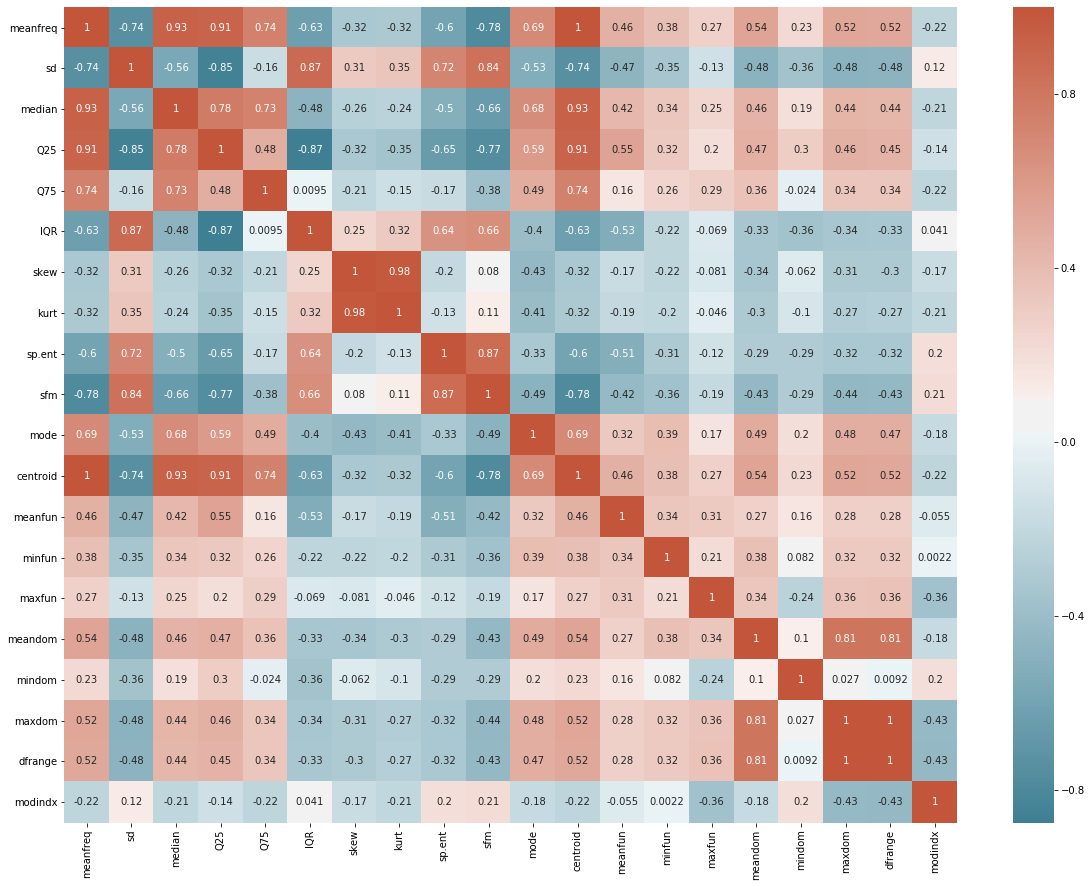

In [9]:
#  Visualizamos la co-relación de las variables del Dataset mediante un Heatmap

corrmat = voice.corr()
f, ax = plt.subplots(figsize=(20, 15))
p =sns.heatmap(corrmat, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

Puedo ver en el Heatmap que los pares de variables **"meanfreq" - "centroid"** y 
**"maxdom" - "dfrange"** se correlacionan totalmente de forma lineal. Por lo tanto
puedo eliminar una de cada par sin afectar el modelo predictivo.

In [10]:
# Elimino de X "centroid" y "dfrange"

x.drop(['centroid', 'dfrange'], axis=1, inplace=True)

In [11]:
## Separamos el Dataset en Train y Test  ##

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=4)

Auto-escalamos todas las features para que queden en los mismos rangos

In [12]:
## Usamos el standard scaler para que queden con media 0 y desvio standard 1

# Creamos el standard scaler y lo fiteamos con xtrain
scaler = preprocessing.StandardScaler().fit(xtrain)
# xtrain_scal tiene el dataset de train pre-procesado con el standard scaler
xtrain_scal = scaler.transform(xtrain)

In [13]:
# Aplicamos el scaler, fiteado con los datos de train, a los datos de test y obtenemos xtest_scal 
xtest_scal = scaler.transform(xtest) 

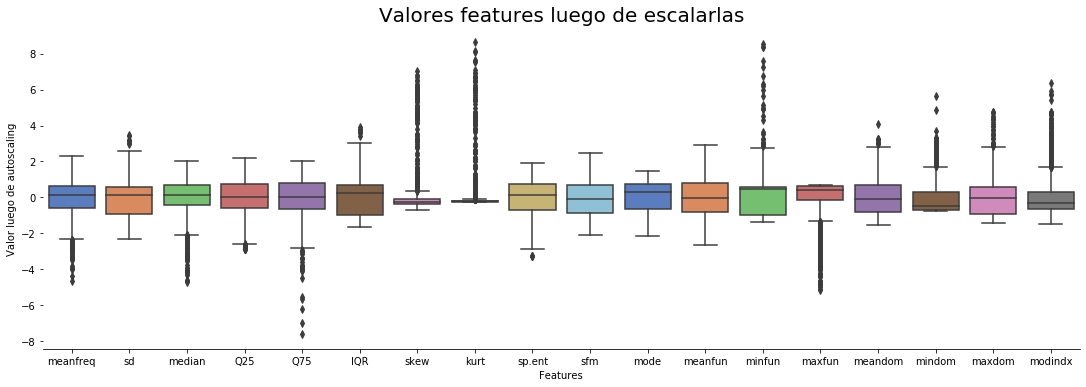

In [14]:
# Visualizamos nuestros datos mediante un Boxplot

#Todas las categorias
g = sns.catplot(data=pd.DataFrame(xtrain_scal, columns=xtrain.columns), kind="box", height = 5 ,aspect=3,palette = "muted")
g.despine(left=True) # Para quitar los el eje Y del plot
g.set_xticklabels(rotation=0)
#g.set(xticks=range(0,34))
plt.xlabel("Features")
plt.ylabel("Valor luego de autoscaling")
plt.title('Valores features luego de escalarlas',size = 20)
plt.show()

### Realizamos PCA (Analisis de Componentes Principales) para lograra una visualización amigable de los datos en menos dimensiones

In [15]:
# definimos PCA y su cantidad de componentes
cant_componentes = 10
sklearn_pca = sklearnPCA(n_components= cant_componentes)

# fiteamos el PCA a nuestros datos
xpca = pd.DataFrame(sklearn_pca.fit_transform(xtrain_scal))

# obtenemos autovalores
eigenvalues = sklearn_pca.explained_variance_ratio_

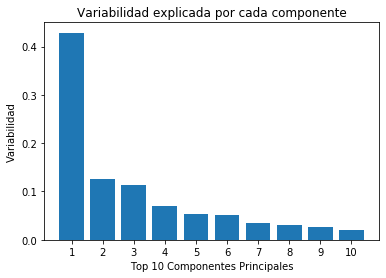

In [16]:
# Vemos los autovalores para saber cual componente explica mayor variabilidad

componentes = range(1,cant_componentes + 1)
plt.bar(componentes,eigenvalues)
plt.xticks(componentes)
plt.title('Variabilidad explicada por cada componente')
plt.xlabel('Top 10 Componentes Principales')
plt.ylabel('Variabilidad')
plt.show()

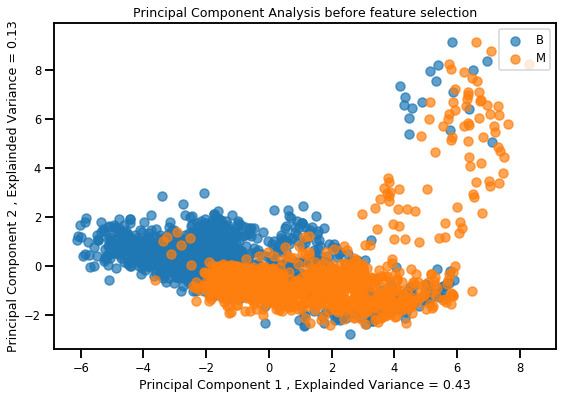

In [17]:
# Con las 2 primeras componentes logramos captar un 56% de la variabilidad

sns.set_context("talk", font_scale=0.7)
plt.figure(figsize=(9,6))
plt.scatter(xpca.loc[(ytrain == 0).ravel(),0],xpca.loc[(ytrain == 0).ravel(),1], alpha = 0.7, label = 'B')
plt.scatter(xpca.loc[(ytrain == 1).ravel(),0],xpca.loc[(ytrain == 1).ravel(),1], alpha = 0.7, label = 'M')
plt.xlabel('Principal Component 1 , Explainded Variance = ' + str(np.round(eigenvalues[0],2)))
plt.ylabel('Principal Component 2 , Explainded Variance = ' + str(np.round(eigenvalues[1],2)))
plt.title('Principal Component Analysis before feature selection')
plt.legend(loc='upper right')
plt.show()

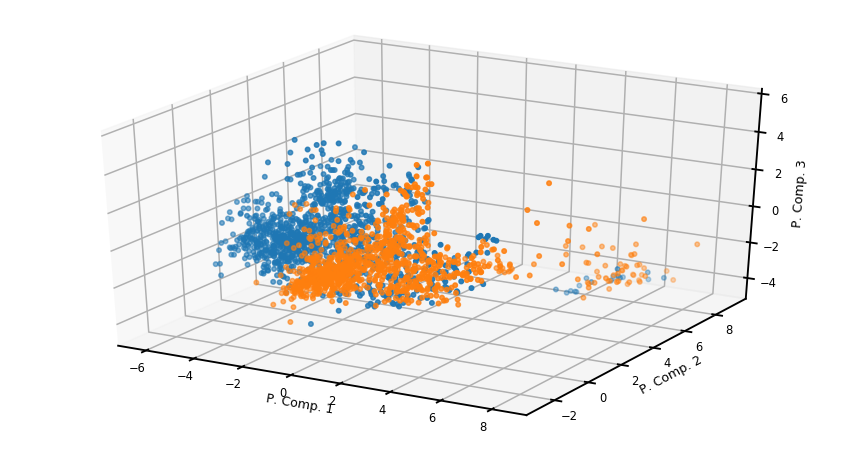

In [18]:
# Al ser poca variabilidad usamos 3 componentes para lograr llegar a un porcentage mas alto 

fig = plt.figure(figsize=[15, 8])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xpca.iloc[(ytrain == 0).ravel(),0], xpca.iloc[(ytrain == 0).ravel(),1], xpca.iloc[(ytrain == 0).ravel(),2])
ax.scatter(xpca.iloc[(ytrain == 1).ravel(),0], xpca.iloc[(ytrain == 1).ravel(),1], xpca.iloc[(ytrain == 1).ravel(),2])
ax.set_xlabel('P. Comp. 1')
ax.set_ylabel('P. Comp. 2')
ax.set_zlabel('P. Comp. 3')
plt.show()

### Probamos 3 metodos distintos de Feature Selection y nos quedamos con el que tenga mejores resultados

## **Variance Threshold**

In [19]:
# Umbral para definir con que % de features nos quedamos
thresh = 0.6

xtrain_scal_red_var = xtrain.iloc[:,
               (np.std(xtrain)>np.quantile(np.std(xtrain), thresh)).values]
xtest_scal_red_var = xtest.iloc[:,
               (np.std(xtrain)>np.quantile(np.std(xtrain), thresh)).values]
# El test lo estoy filtrando por el desvio y cuantil del train

print(f"Usando Variance-Threshold de 60% nos quedamos con {str(np.shape(xtrain_scal_red_var)[1])} features")

Usando Variance-Threshold de 60% nos quedamos con 7 features


In [20]:
# Vemos las features que sobrevivieron la selección

for i in range(len(xtrain_scal_red_var.columns)):
    print(xtrain_scal_red_var.columns[i], end='     ')

skew     kurt     sfm     mode     meandom     maxdom     modindx     

Ahora lo repito para distintos valores de alpha
(no salio hacer el ciclo for)

In [21]:
xtrain_scal_red_var_2 = xtrain.iloc[:,(np.std(xtrain)>np.quantile(np.std(xtrain), 0.5)).values];xtest_scal_red_var_2 = xtest.iloc[:,(np.std(xtrain)>np.quantile(np.std(xtrain), 0.5)).values]
print(f"Usando Variance-Threshold de 50% nos quedamos con {str(np.shape(xtrain_scal_red_var_2)[1])} features")
xtrain_scal_red_var_3 = xtrain.iloc[:,(np.std(xtrain)>np.quantile(np.std(xtrain), 0.4)).values];xtest_scal_red_var_3 = xtest.iloc[:,(np.std(xtrain)>np.quantile(np.std(xtrain), 0.4)).values]
print(f"Usando Variance-Threshold de 40% nos quedamos con {str(np.shape(xtrain_scal_red_var_3)[1])} features")
xtrain_scal_red_var_4 = xtrain.iloc[:,(np.std(xtrain)>np.quantile(np.std(xtrain), 0.3)).values];xtest_scal_red_var_4 = xtest.iloc[:,(np.std(xtrain)>np.quantile(np.std(xtrain), 0.3)).values]
print(f"Usando Variance-Threshold de 30% nos quedamos con {str(np.shape(xtrain_scal_red_var_4)[1])} features")
xtrain_scal_red_var_5 = xtrain.iloc[:,(np.std(xtrain)>np.quantile(np.std(xtrain), 0.2)).values];xtest_scal_red_var_5 = xtest.iloc[:,(np.std(xtrain)>np.quantile(np.std(xtrain), 0.2)).values]
print(f"Usando Variance-Threshold de 20% nos quedamos con {str(np.shape(xtrain_scal_red_var_5)[1])} features")

Usando Variance-Threshold de 50% nos quedamos con 9 features
Usando Variance-Threshold de 40% nos quedamos con 11 features
Usando Variance-Threshold de 30% nos quedamos con 12 features
Usando Variance-Threshold de 20% nos quedamos con 14 features


##  **Lasso**

In [22]:
# Utilizamos un valor de alpha muy chico para aumentar la penalización y que sobrevivan pocas features

lasso_featsel = Lasso(alpha = 0.01)
lasso_featsel.fit(xtrain_scal,ytrain)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [23]:
lasso_num_feat_sel = int(np.count_nonzero(lasso_featsel.coef_))

print(f"Usando Lasso nos quedamos con {str(lasso_num_feat_sel)} features")

Usando Lasso nos quedamos con 8 features


In [24]:
# Coeficientes de Beta de Lasso

lasso_featsel.coef_

array([ 0.        ,  0.        , -0.        , -0.        ,  0.0460548 ,
        0.12957386, -0.04107505, -0.        , -0.        , -0.01009088,
        0.01350815, -0.38064093,  0.05098862,  0.00494723, -0.        ,
        0.        , -0.        , -0.        ])

In [25]:
# Vemos las features que sobrevivieron la selección

lasso_feat_cols = lasso_featsel.coef_ != 0
posiciones = np.where(lasso_feat_cols)

for i in range(len(posiciones[0])):
    print(voice.columns[posiciones[0][i]], end='     ')

Q75     IQR     skew     sfm     mode     centroid     meanfun     minfun     

In [26]:
# generamos los nuevos sets de train y de test con las columnas seleccionadas luego de Lasso
xtrain_scal_red_lasso = xtrain_scal[:, lasso_feat_cols]
xtest_scal_red_lasso = xtest_scal[:, lasso_feat_cols]

**Ahora lo repito para distintos valores de alpha**
(no salio hacer el ciclo for)

In [27]:
lasso_featsel = Lasso(alpha = 0.005);lasso_featsel.fit(xtrain_scal,ytrain);lasso_feat_cols = lasso_featsel.coef_ != 0;xtrain_scal_red_lasso_2 = xtrain_scal[:, lasso_feat_cols];xtest_scal_red_lasso_2 = xtest_scal[:, lasso_feat_cols]
print(f"Con alpha = 0.005 quedan {len(np.where(lasso_feat_cols)[0])} features")
lasso_featsel = Lasso(alpha = 0.001);lasso_featsel.fit(xtrain_scal,ytrain);lasso_feat_cols = lasso_featsel.coef_ != 0;xtrain_scal_red_lasso_3 = xtrain_scal[:, lasso_feat_cols];xtest_scal_red_lasso_3 = xtest_scal[:, lasso_feat_cols]
print(f"Con alpha = 0.001 quedan {len(np.where(lasso_feat_cols)[0])} features")
lasso_featsel = Lasso(alpha = 0.0005);lasso_featsel.fit(xtrain_scal,ytrain);lasso_feat_cols = lasso_featsel.coef_ != 0;xtrain_scal_red_lasso_4 = xtrain_scal[:, lasso_feat_cols];xtest_scal_red_lasso_4 = xtest_scal[:, lasso_feat_cols]
print(f"Con alpha = 0.0005 quedan {len(np.where(lasso_feat_cols)[0])} features")
lasso_featsel = Lasso(alpha = 0.0001);lasso_featsel.fit(xtrain_scal,ytrain);lasso_feat_cols = lasso_featsel.coef_ != 0;xtrain_scal_red_lasso_5 = xtrain_scal[:, lasso_feat_cols];xtest_scal_red_lasso_5 = xtest_scal[:, lasso_feat_cols]
print(f"Con alpha = 0.0001 quedan {len(np.where(lasso_feat_cols)[0])} features")

Con alpha = 0.005 quedan 10 features
Con alpha = 0.001 quedan 15 features
Con alpha = 0.0005 quedan 16 features
Con alpha = 0.0001 quedan 18 features


## **RFE**

In [28]:
# Creo el SVM para clasificar en cada iteracion del RFE

# Defino el costo del modelo
costrfe = 30
svcrfe = svm.SVC(C=costrfe, kernel="linear")

In [29]:
# Defino el modelo RFE
# Indico 'accuracy, el scoring que quiero para seleccionar las features usando CrossValidation de 10 folds

rfecv = RFECV(estimator=svcrfe, step=1, cv=10, scoring='accuracy')

# selecciono las variables con el set de train
rfecv.fit(xtrain_scal, ytrain)

RFECV(cv=10,
      estimator=SVC(C=30, cache_size=200, class_weight=None, coef0=0.0,
                    decision_function_shape='ovr', degree=3,
                    gamma='auto_deprecated', kernel='linear', max_iter=-1,
                    probability=False, random_state=None, shrinking=True,
                    tol=0.001, verbose=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

Optimal number of features : 9


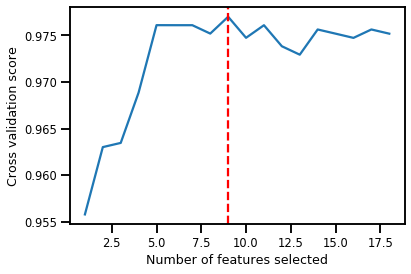

In [30]:
print("Optimal number of features : %d" % rfecv.n_features_)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.axvline(x=np.argmax(rfecv.grid_scores_)+1, c= 'r', linestyle = '--')
plt.show()

In [31]:
# Obtengo las posiciones de las columnas de las features que fueron seleccionadas
feat_rfe = rfecv.support_ == True
print(f"Usando RFE nos quedamos con {str(rfecv.n_features_)} features")

Usando RFE nos quedamos con 9 features


In [32]:
# generamos los nuevos sets de train y de test con las columnas seleccionadas luego de RFE
xtrain_scal_red_rfe = xtrain_scal[:,rfecv.support_]
xtest_scal_red_rfe = xtest_scal[:,rfecv.support_]

### Entrenamos 3 Clasificadores usando los sets reducidos en features y el set original

## SVM
Decidimos usar solo Kernel rbf porque el lineal tardaba mucho tiempo y ademas no tenia buenos resultados

In [79]:
# Defino modelo SVM con kernel Gaussiano
svc = svm.SVC(kernel = 'rbf', probability=True)

# Realizo gridSearch para encontrar la mejor combinacion de hiperparametros para el SVM
# Uso una escala exponencial en C y en gamma, asi abarco un mayor rango
parameters = {'C':[1, 10, 50, 100], 'gamma':[0.0001,0.001, 0.01, 0.1,1, 10]}
clf = GridSearchCV(svc, param_grid = parameters, refit = True, cv = 10)

In [34]:
threshs = [0.6, 0.5, 0.4, 0.3, 0.2]
xtrains_con_var = [xtrain_scal_red_var, xtrain_scal_red_var_2, xtrain_scal_red_var_3, xtrain_scal_red_var_4, xtrain_scal_red_var_5]
xtests_con_var = [xtest_scal_red_var, xtest_scal_red_var_2, xtest_scal_red_var_3, xtest_scal_red_var_4, xtest_scal_red_var_5]

for i in range(0,5,1):
    clf.fit(xtrains_con_var[i], ytrain) 
    ypred = clf.predict(xtests_con_var[i])
    test_acc1 = accuracy_score(ytest, ypred)
    print(f"El accuracy usando Variance Threshold con un threshold de {threshs[i]} es {str(test_acc1)}")

El accuracy usando Variance Threshold con un threshold de 0.6 es 0.7378947368421053
El accuracy usando Variance Threshold con un threshold de 0.5 es 0.7978947368421052
El accuracy usando Variance Threshold con un threshold de 0.4 es 0.8663157894736843
El accuracy usando Variance Threshold con un threshold de 0.3 es 0.8673684210526316
El accuracy usando Variance Threshold con un threshold de 0.2 es 0.9105263157894737


**El mejor threshold es de 0.2 (sin probar otros) para FS Variance Threshold con una accuracy = 0.9105263157894737**

In [35]:
alphas = [0.01, 0.005, 0.001, 0.0005, 0.0001]
xtrains_con_lasso = [xtrain_scal_red_lasso, xtrain_scal_red_lasso_2, xtrain_scal_red_lasso_3, xtrain_scal_red_lasso_4, xtrain_scal_red_lasso_5]
xtests_con_lasso = [xtest_scal_red_lasso, xtest_scal_red_lasso_2, xtest_scal_red_lasso_3, xtest_scal_red_lasso_4, xtest_scal_red_lasso_5]

for i in range(0,5,1):
    clf.fit(xtrains_con_lasso[i], ytrain) 
    ypred = clf.predict(xtests_con_lasso[i])
    test_acc1 = accuracy_score(ytest, ypred)
    print(f"El accuracy usando Lasso con alpha {alphas[i]} es {str(test_acc1)}")

El accuracy usando Lasso con alpha 0.01 es 0.9768421052631578
El accuracy usando Lasso con alpha 0.005 es 0.9705263157894737
El accuracy usando Lasso con alpha 0.001 es 0.9757894736842105
El accuracy usando Lasso con alpha 0.0005 es 0.9747368421052631
El accuracy usando Lasso con alpha 0.0001 es 0.9789473684210527


**El mejor alpha para FS Lasso es 0.0001 con el que se obtuvo una accuracy = 0.9789473684210527**

In [87]:
clf.fit(xtrain_scal_red_rfe, ytrain) 
ypred_Ganador_SVM = clf.predict(xtest_scal_red_rfe)

test_acc1 = accuracy_score(ytest, ypred_Ganador_SVM)
print("El accuracy es " + str(test_acc1))

mejoresParametros = clf.best_params_

yproba_svm = clf.predict_proba(xtest_scal_red_rfe)
fpr_svm, tpr_svm, thresholds = roc_curve(ytest.astype('int'), yproba_svm[:,1], drop_intermediate = False)
auc_Ganador_SVM = metrics.auc(fpr_svm, tpr_svm)

El accuracy es 0.98


**Usando RFE con un costo = 30 obtuvimos un accuracy = 0.98**

In [37]:
clf.fit(xtrain_scal, ytrain) 
ypred = clf.predict(xtest_scal)

test_acc1 = accuracy_score(ytest, ypred)
print("El accuracy es " + str(test_acc1))

El accuracy es 0.9789473684210527


**Sin realizar un Feature Selection obtuvimos una accuracy = 0.9789473684210527**

### Conclusion de SVM: Con RFE de costo 30 conseguimos un 98% de accuracy

## KNN

In [33]:
# Defino modelo KNN llamado "neigh"
neigh = KNeighborsClassifier()

# Realizo gridSearch para encontrar la mejor combinacion de hiperparametros para el KNN
gridParameters = {'n_neighbors': [1,2,3,5,7,10,15,20,30,50,100,200,500],
                  'weights': ['uniform','distance'],
                  'metric': ['euclidean', 'manhattan']}
#weights: se refiere a si los puntos valen todos por 1 voto o si los
#         que estan mas cerca valen más que los lejanos
#metric: me dice de que forma se calcula la distancia entre los puntos,
#        tiene mas sentido cuando son muchas dimensiones
clf = GridSearchCV(neigh, gridParameters, cv = 10)

In [39]:
threshs = [0.6, 0.5, 0.4, 0.3, 0.2]
xtrains_con_var = [xtrain_scal_red_var, xtrain_scal_red_var_2, xtrain_scal_red_var_3, xtrain_scal_red_var_4, xtrain_scal_red_var_5]
xtests_con_var = [xtest_scal_red_var, xtest_scal_red_var_2, xtest_scal_red_var_3, xtest_scal_red_var_4, xtest_scal_red_var_5]

for i in range(0,5,1):
    clf.fit(xtrains_con_var[i], ytrain) 
    
    ypred = clf.predict(xtests_con_var[i])
    test_acc1 = accuracy_score(ytest, ypred)
    
    ypred = clf.predict(xtrains_con_var[i]) 
    Knn_score_train = accuracy_score(ytrain,ypred)
    
    print(f"Threshold {threshs[i]}\t->\tTest: {str(test_acc1)}\tTrain: {str(Knn_score_train)}")
    #print(f"El accuracy usando Variance Threshold con un threshold de {threshs[i]} es {str(test_acc1)}")

Threshold 0.6	->	Test: 0.74	Train: 1.0
Threshold 0.5	->	Test: 0.7473684210526316	Train: 1.0
Threshold 0.4	->	Test: 0.76	Train: 1.0
Threshold 0.3	->	Test: 0.7726315789473684	Train: 1.0
Threshold 0.2	->	Test: 0.7978947368421052	Train: 1.0


**El mejor threshold es de 0.2 (sin probar otros) para FS Variance Threshold con una accuracy = 0.7978947368421052**

In [41]:
alphas = [0.01, 0.005, 0.001, 0.0005, 0.0001]
xtrains_con_lasso = [xtrain_scal_red_lasso, xtrain_scal_red_lasso_2, xtrain_scal_red_lasso_3, xtrain_scal_red_lasso_4, xtrain_scal_red_lasso_5]
xtests_con_lasso = [xtest_scal_red_lasso, xtest_scal_red_lasso_2, xtest_scal_red_lasso_3, xtest_scal_red_lasso_4, xtest_scal_red_lasso_5]

for i in range(0,5,1):
    clf.fit(xtrains_con_lasso[i], ytrain) 
    
    ypred = clf.predict(xtests_con_lasso[i])
    test_acc1 = accuracy_score(ytest, ypred)
    
    ypred = clf.predict(xtrains_con_lasso[i]) 
    Knn_score_train = accuracy_score(ytrain,ypred)

    print(f"El accuracy usando Lasso con alpha {alphas[i]}\t->\tTest: {str(test_acc1)}\tTrain: {str(Knn_score_train)}")


clf.fit(xtrains_con_lasso[2], ytrain)
ypred_Ganador_KNN = clf.predict(xtests_con_lasso[2])

yproba_knn = clf.predict_proba(xtests_con_lasso[2])
fpr_knn, tpr_knn, thresholds = roc_curve(ytest.astype('int'), yproba_knn[:,1], drop_intermediate = False)
auc_Ganador_KNN = metrics.auc(fpr_knn, tpr_knn)

El accuracy usando Lasso con alpha 0.01	->	Test: 0.9578947368421052	Train: 0.9864620938628159
El accuracy usando Lasso con alpha 0.005	->	Test: 0.968421052631579	Train: 0.9869133574007221
El accuracy usando Lasso con alpha 0.001	->	Test: 0.9663157894736842	Train: 0.990072202166065
El accuracy usando Lasso con alpha 0.0005	->	Test: 0.968421052631579	Train: 0.9918772563176895
El accuracy usando Lasso con alpha 0.0001	->	Test: 0.968421052631579	Train: 1.0


**El mejor alpha para FS Lasso es 0.005 ya que con este usamos menos features que con otros alphas que obtuvieron el mismo accuracy = 0.968421052631579**

In [46]:
clf.fit(xtrain_scal_red_rfe, ytrain) 

ypred = clf.predict(xtest_scal_red_rfe)
test_acc1 = accuracy_score(ytest, ypred)

ypred = clf.predict(xtrain_scal_red_rfe) 
Knn_score_train = accuracy_score(ytrain,ypred)
print(f"El accuracy con RFE es Test: {str(test_acc1)}   Train: {str(Knn_score_train)}")

El accuracy con RFE es Test: 0.9610526315789474   Train: 1.0


**Usando RFE con un costo = 30 obtuvimos un accuracy = 0.9610526315789474**

In [47]:
clf.fit(xtrain_scal, ytrain) 
ypred = clf.predict(xtest_scal)
test_acc1 = accuracy_score(ytest, ypred)

ypred = clf.predict(xtrain_scal) 
Knn_score_train = accuracy_score(ytrain,ypred)
print(f"El accuracy sin FS es Test: {str(test_acc1)}   Train: {str(Knn_score_train)}")

El accuracy sin FS es Test: 0.968421052631579   Train: 1.0


**Sin realizar un Feature Selection obtuvimos una accuracy = 0.968421052631579**

### Conclusion de KNN: Con todas las features o usando FS Lasso con alpha 0.005 obtuvimos la mayor accuracy. Elegimos la opcion de Lasso ya que usa 10 features en vez de todas las de X. Esto tiene mayor influencia mientras mas grande es el Dataset

## Logistic Regression

In [48]:
# definimos el modelo LR bajo el nombre "lr_model"
lr_model = LogisticRegression(random_state=0, solver='lbfgs')

# Definimos los costos posibles del modelo LG
params_lr = {'C':[0.01, 0.1, 0.5, 1, 10, 100]}

# Realizo gridSearch para encontrar el mejor costo para el LG
lr_cv = GridSearchCV(lr_model, param_grid = params_lr, refit = True, cv = 10)

In [49]:
import warnings
warnings.filterwarnings('ignore')

threshs = [0.6, 0.5, 0.4, 0.3, 0.2]
xtrains_con_var = [xtrain_scal_red_var, xtrain_scal_red_var_2, xtrain_scal_red_var_3, xtrain_scal_red_var_4, xtrain_scal_red_var_5]
xtests_con_var = [xtest_scal_red_var, xtest_scal_red_var_2, xtest_scal_red_var_3, xtest_scal_red_var_4, xtest_scal_red_var_5]

for i in range(0,5,1):
    lr_cv.fit(xtrains_con_var[i], ytrain) 
    print(f"El mejor costo es {lr_cv.best_params_}") # Vemos el mejor costo elegido por el GridSearch
    ypred = lr_cv.predict(xtests_con_var[i])
    test_acc1 = accuracy_score(ytest, ypred)
    
    ypred = lr_cv.predict(xtrains_con_var[i]) 
    LG_score_train = accuracy_score(ytrain,ypred)
    print(f"Threshold de {threshs[i]} es Test: {str(test_acc1)}   Train: {str(LG_score_train)}")

El mejor costo es {'C': 0.1}
Threshold de 0.6 es Test: 0.7115789473684211   Train: 0.7093862815884476
El mejor costo es {'C': 10}
Threshold de 0.5 es Test: 0.7136842105263158   Train: 0.7184115523465704
El mejor costo es {'C': 100}
Threshold de 0.4 es Test: 0.8726315789473684   Train: 0.881768953068592
El mejor costo es {'C': 100}
Threshold de 0.3 es Test: 0.8778947368421053   Train: 0.8813176895306859
El mejor costo es {'C': 10}
Threshold de 0.2 es Test: 0.9105263157894737   Train: 0.9201263537906137


**El mejor threshold es de 0.2 (sin probar otros) para FS Variance Threshold con una accuracy = 0.9105263157894737**

In [50]:
alphas = [0.01, 0.005, 0.001, 0.0005, 0.0001]
xtrains_con_lasso = [xtrain_scal_red_lasso, xtrain_scal_red_lasso_2, xtrain_scal_red_lasso_3, xtrain_scal_red_lasso_4, xtrain_scal_red_lasso_5]
xtests_con_lasso = [xtest_scal_red_lasso, xtest_scal_red_lasso_2, xtest_scal_red_lasso_3, xtest_scal_red_lasso_4, xtest_scal_red_lasso_5]

for i in range(0,5,1):
    lr_cv.fit(xtrains_con_lasso[i], ytrain)
    print(f"El mejor costo es {lr_cv.best_params_}") # Vemos el mejor costo elegido por el GridSearch
    ypred = lr_cv.predict(xtests_con_lasso[i])
    test_acc1 = accuracy_score(ytest, ypred)
    
    ypred = lr_cv.predict(xtrains_con_lasso[i]) 
    LG_score_train = accuracy_score(ytrain,ypred)
    print(f"Con alpha {alphas[i]} es Test: {str(test_acc1)}   Train: {str(LG_score_train)}")

El mejor costo es {'C': 1}
Con alpha 0.01 es Test: 0.9694736842105263   Train: 0.9756317689530686
El mejor costo es {'C': 1}
Con alpha 0.005 es Test: 0.968421052631579   Train: 0.9756317689530686
El mejor costo es {'C': 0.5}
Con alpha 0.001 es Test: 0.9705263157894737   Train: 0.9742779783393501
El mejor costo es {'C': 0.5}
Con alpha 0.0005 es Test: 0.9694736842105263   Train: 0.9760830324909747
El mejor costo es {'C': 0.5}
Con alpha 0.0001 es Test: 0.9705263157894737   Train: 0.9756317689530686


**El mejor alpha para FS Lasso es 0.005 ya que con este usamos menos features que con otros alphas que obtuvieron el mismo accuracy = 0.9705263157894737**

In [54]:
lr_cv.fit(xtrain_scal_red_rfe, ytrain)
print(f"El mejor costo es {lr_cv.best_params_}") # Vemos el mejor costo elegido por el GridSearch
ypred_ganador_LG = lr_cv.predict(xtest_scal_red_rfe)
test_acc1 = accuracy_score(ytest, ypred_ganador_LG)


ypred = lr_cv.predict(xtrain_scal_red_rfe) 
LG_score_train = accuracy_score(ytrain,ypred)

print(f"El accuracy con RFE es Test:{str(test_acc1)}   Train: {str(LG_score_train)}")

El mejor costo es {'C': 1}
El accuracy con RFE es Test:0.9705263157894737   Train: 0.9751805054151624


**Usando RFE con un costo = 30 obtuvimos un accuracy = 0.9705263157894737**

In [55]:
lr_cv.fit(xtrain_scal, ytrain) 
print(f"El mejor costo es {lr_cv.best_params_}")
ypred_ganador_LG = lr_cv.predict(xtest_scal)
test_acc1 = accuracy_score(ytest, ypred_ganador_LG)

ypred = lr_cv.predict(xtrain_scal) 
LG_score_train = accuracy_score(ytrain,ypred)

print(f"El accuracy sin FS es Test:{str(test_acc1)}   Train: {str(LG_score_train)}")

yproba_lr = lr_cv.predict_proba(xtest_scal)
fpr_lr, tpr_lr, thresholds = roc_curve(ytest.astype('int'), yproba_lr[:,1], drop_intermediate = False)
auc_Ganador_LG = metrics.auc(fpr_lr, tpr_lr)

El mejor costo es {'C': 0.5}
El accuracy sin FS es Test:0.9705263157894737   Train: 0.9756317689530686


**Sin realizar un Feature Selection obtuvimos una accuracy = 0.9705263157894737**

### Conclusion de LG: Con RFE con un Costo de 30 obtuvimos y Lasso con alpha 0.005 la mejor accuracy. Elegimos la opcion de RFE porque trabaja con una feature menos (9 en vez de 10)

# Generamos la matriz de confucion y calculamos el area bajo la curva ROC para cada uno de los mejores modelos que evaluamos

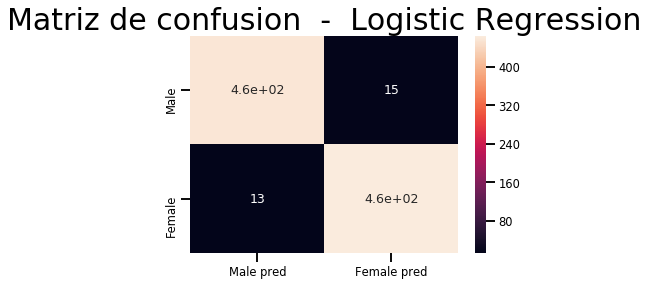



El AUC es = 0.9945705408627743


In [83]:
# El area bajo la curva ROC nos dice como es la relacion entre True Positive y False Positive para  
# distintos "umbrales" de clasificación.

cm_lr = confusion_matrix(ytest, ypred_ganador_LG)
df_cm = pd.DataFrame(cm_lr, index = ['Male', 'Female'], columns = ['Male pred', 'Female pred'])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True)
plt.title('Matriz de confusion  -  Logistic Regression', fontsize=30)
plt.show()

print("\n\nEl AUC es = " + str(auc_Ganador_LG))

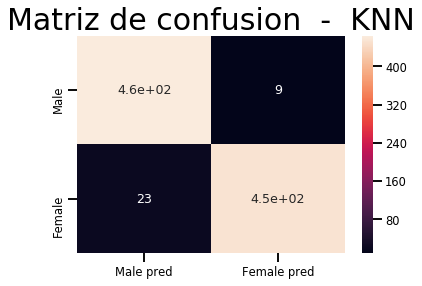



El AUC es = 0.9799575394134411


In [82]:
cm_lr = confusion_matrix(ytest, ypred_Ganador_KNN)
df_cm = pd.DataFrame(cm_lr, index = ['Male', 'Female'], columns = ['Male pred', 'Female pred'])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True)
plt.title('Matriz de confusion  -  KNN', fontsize=30)
plt.show()

print("\n\nEl AUC es = " + str(auc_Ganador_KNN))

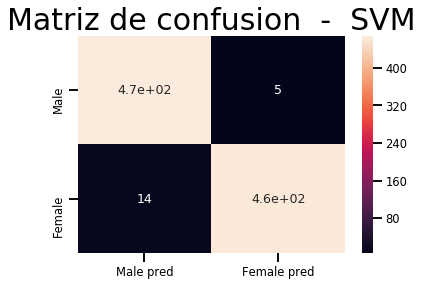



El AUC es = 0.996139543748144


In [84]:
cm_lr = confusion_matrix(ytest, ypred_Ganador_SVM)
df_cm = pd.DataFrame(cm_lr, index = ['Male', 'Female'], columns = ['Male pred', 'Female pred'])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True)
plt.title('Matriz de confusion  -  SVM', fontsize=30)
plt.show()

print("\n\nEl AUC es = " + str(auc_Ganador_SVM))

# - - - Conclusion final - - -
### Luego de todo el análisis siguiendo el workflow de ciencia de datos sobre el dataset "Voice". Determinamos que el mejor modelo clasificatorio para determinar si el sujeto es varon o mujer es haciendo Feature Selection con RFE de valor costo 30 y un modelo SVM con Costo = 10 y Gamma = 0.1 Este modelo logro un 98% de accuracy y un indice AUC de 0.996

### Dejo de funcionar el SVM y para ese modelo ganador en Acc de Test no pude calcular su Acc de Train. Por lo tanto elegimos Logistic Regression con RFE de costo 30 es AccTest:0.97  Train: 0.975 y AUC de 0.9945